# Package 설치

In [1]:
# %pip install transformers tokenizers datasets accelerate evaluate scikit-learn -qU

In [ ]:
# %pip install ipywidgets tqdm

In [ ]:
# pip install torch torchvision torchaudio

  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
  Using cached torchaudio-2.5.1-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
Using cached torch-2.5.1-cp312-cp312-win_amd64.whl (203.0 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl (1.6 MB)
Using cached torchaudio-2.5.1-cp312-cp312-win_amd64.whl (2.4 MB)
Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install transformers datasets evaluate tokenizers numpy torchinfo korpora konlpy pandas


  Using cached transformers-4.46.3-py3-none-any.whl.metadata (44 kB)
  Using cached datasets-3.1.0-py3-none-any.whl.metadata (20 kB)
  Using cached evaluate-0.4.3-py3-none-any.whl.metadata (9.2 kB)
  Using cached tokenizers-0.21.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
  Using cached Korpora-0.2.0-py3-none-any.whl.metadata (26 kB)
  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tokenizers-0.20.3-cp312-none-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.4.5-cp312-none-win_amd64.whl.metadata (3.9 kB)
  Using cached tqdm-4.67.1

In [1]:
import transformers
import datasets
import evaluate
import tokenizers
print(transformers.__version__)
print(datasets.__version__)
print(evaluate.__version__)
print(tokenizers.__version__)


4.46.3
3.1.0
0.4.3
0.20.3


### Hugging Face Pipeline을 이용한 모델 활용

- Pipeline은 Transformers 라이브러리의 가장 기본적인 객체로, **전처리 - 추론 -> 후처리** 로 이어지는 일련의 과정을 자동화하여 손쉽게 모델을 사용할 수 있게 해준다.  

- Task에 따라 다양한 Pipeline 클래스를 제공하며 `pipeline` 함수를 이용해 쉽게 생성할 수 있다.  

- **task만 지정**해서 기본 제공 모델과 토크나이저를 사용하거나 **직접 모델과 토크나이저를 지정**해 생성할 수 있다.  

- https://huggingface.co/docs/transformers/pipeline_tutorial

![huggingface_pipeline.png](figures/huggingface_pipeline.png)


이 그림은 텍스트 데이터를 입력받아 모델을 통해 처리하고 최종 결과를 예측하는 과정을 단계별로 설명한 흐름도입니다.   
주요 구성 요소와 각 단계의 역할은 다음과 같습니다:

#### 1. Raw Text  

- 설명: 사용자가 입력한 텍스트 데이터입니다.  

- 예: "This course is amazing" (이 문장은 긍정적임을 나타냄).  

- 필요성: 자연어 모델은 텍스트를 입력으로 받아야 작업을 수행할 수 있습니다.  

#### 2. Tokenizer  

- 설명: 원시 텍스트 데이터를 숫자(ID)의 형태로 변환하는 단계입니다.  

- 토큰화(Tokenization) 과정에서 텍스트는 단어 또는 하위 단위로 나뉘고, 각각 고유한 정수 ID로 매핑됩니다.  

- 예: "This course is amazing" → [101, 2023, 2607, 2003, 6429, 999, 102]  

  - [101]: 문장의 시작 토큰
  - [102]: 문장의 끝 토큰  

- 필요성: 머신러닝 모델은 숫자 형태의 데이터를 처리하므로, 텍스트를 정수 형태로 변환해야 합니다.  

#### 3. Model  

- 설명: 숫자로 변환된 입력 데이터(입력 ID)를 기반으로 예측을 수행하는 단계입니다.  

- 입력 데이터는 임베딩 레이어 → 신경망 → 출력층을 거치며 연산됩니다.  

- 출력은 Logits 형태로 제공됩니다. Logits는 모델이 각 클래스에 대해 계산한 점수입니다.  

- 예: [-4.3630, 4.6859]  

  - 첫 번째 값(-4.3630): 부정(negative)의 점수
  - 두 번째 값(4.6859): 긍정(positive)의 점수  

- 필요성: 모델이 데이터를 처리하여 입력 텍스트의 의미를 이해하고 점수를 계산합니다.  

#### 4. Post Processing  

- 설명: 모델 출력인 Logits를 사람이 이해할 수 있는 예측 결과로 변환하는 단계입니다.  

- Logits에 Softmax 함수를 적용해 각 클래스의 확률로 변환합니다.  

- 예:  

  - Softmax 결과: [0.0011, 0.9989]
  - 긍정: 99.89%
  - 부정: 0.11%
  - 최종 출력: "POSITIVE: 99.89%"  

- 필요성: 점수를 확률로 변환해 모델의 결론을 직관적으로 이해할 수 있습니다.  


#### 전체 흐름  

- 입력 텍스트(Raw Text): 사용자가 입력한 문장 →  

- 토크나이저(Tokenization): 숫자 형태의 입력 데이터로 변환 →  

- 모델(Model): 숫자 데이터를 연산해 클래스별 점수(Logits) 계산 →  

- 후처리(Post Processing): 점수를 확률로 변환해 최종 예측 생성.  

- 예시  

  - 입력 문장: "This course is amazing"
  - 모델의 출력(Logits): [-4.3630, 4.6859]
  - 후처리된 결과: "POSITIVE: 99.89%, NEGATIVE: 0.11%"  

- 이 과정은 감정 분석, 번역, 문서 요약 등 다양한 자연어 처리 작업에서 사용됩니다.

## 지원하는 주요 태스크  

### 자연어 처리 태스크  

- **text-classification**: 텍스트 분류  

- **text-generation**: 텍스트 생성  

- **translation**: 번역  

- **summarization**: 요약  

- **question-answering**: 질의응답  

- **fill-mask**: 마스크 토큰 채우기  

- **ner**: 개체명 인식  

- **feature-extraction**: 특징 추출(context vector)

### 영상 처리 태스크  

- **image-classification**: 이미지 분류  

- **object-detection**  

  -  객체 검출 (Object Detection)  

  -  이미지 안에서 객체들의 위치와 class를 찾아내는 작업  

- **image-segmentation**  

  -  이미지 세분화 (Image Segmentation)   
  
  -  이미지를 픽셀 단위로 분할하여 각 픽셀이 어떤 객체에 속하는지 분류하는 작업

## pipeline 함수
- 주요파라미터
  - **task:** 수행하려는 작업의 유형을 문자열로 지정.  

  - **model:**  

    - 사용할 사전 학습된 모델의 이름 또는 경로를 지정한다.   

    - 모델이름(ID)은 `[모델소유자이름]/[모델이름]` 형식이다. Hugging Face에서 제공하는 모델의 경우는 사용자명이 생략되어 있다. .  
 (ex: "google/gemma-2-2b", "gpt2")
    - 모델을 명시적으로 지정하지 않으면, **task에 맞는 기본 모델이 로드**된다.  

  - **tokenizer:** 사용할 토크나이저를 지정. 생략하면 모델과 같이 제공되(model과 이름이 같은 토크나이저)는 토크나이저를 사용한다.  

  - **framework:** 사용할 딥러닝 프레임워크를 지정. 'pt'는 PyTorch(Default), 'tf'는 TensorFlow를 지정한다.  

  - **device:** 모델을 실행할 디바이스를 지정합니다. -1은 CPU, 0은 첫 번째 GPU를 의미합니다.  

  - **revision:** 모델의 특정 버전을 지정할 때 사용합니다.  

  - **use_fast:** 
    - 빠른 토크나이저를 사용할지 여부를 지정합니다. 기본값은 True입니다.  

    - 빠른 토크나이저는 `Rust` 언어로 구현되어 속도가 빠르다. 단 모든 모델에 대해 지원하지 않는다.  
      지원하지 않을 경우 `use_fast=True`로 설정해도 일반 토크나이저가 사용된다.

## 모델 검색
![huggingface_model_search.png](figures/huggingface_model_search.png)



### 텍스트 분류 (감정분석)

In [22]:
# 경고 출력 막기
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
from transformers import pipeline
# Module Not Found Error, tf-keras  => 발생. framework="pt"
model = pipeline(task="text-classification") #,  framework="pt")

# (모델 다운로드) '모델, 토크나이저'  로딩 -> txt 토큰화 -> 모델을 이용하여 추론화 -> 결과 후처리
res = model("It is not funny.")
print(res)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9997994303703308}]


In [3]:
type(model)

transformers.pipelines.text_classification.TextClassificationPipeline

In [8]:
data = [ 
    "The project was completed successfully.", 
    "She always brings positive energy to the team.", 
    "I am confident that we will achieve our goals.",
    "The results were not as expected.", 
    "He struggled to meet the deadline.", 
    "The client was dissatisfied with the final product." 
]
res = model(data)
from pprint import pprint
pprint(res)

[{'label': 'POSITIVE', 'score': 0.9998227953910828},
 {'label': 'POSITIVE', 'score': 0.9998812675476074},
 {'label': 'POSITIVE', 'score': 0.9998470544815063},
 {'label': 'NEGATIVE', 'score': 0.9978100657463074},
 {'label': 'NEGATIVE', 'score': 0.99960857629776},
 {'label': 'NEGATIVE', 'score': 0.9996129870414734}]


In [9]:
model="distilbert-base-uncased-finetuned-sst-2-english"
classifier = pipeline(task="text-classification", model=model, framework='pt')

In [7]:
kor_texts = [
    "이 영화 정말 재미있어요!",
    "서비스가 별로였어요.",
    "제품 품질이 우수합니다.",
    "따듯하고 부드럽고 제품은 너무 좋습니다. 그런데 배송이 너무 늦네요."  # 애매한 것 0.56 정도 나오네.
]
classifier(kor_texts)

[{'label': 'POSITIVE', 'score': 0.9855567812919617},
 {'label': 'POSITIVE', 'score': 0.7425776124000549},
 {'label': 'POSITIVE', 'score': 0.6555716395378113},
 {'label': 'NEGATIVE', 'score': 0.5247918367385864}]

In [8]:
model = 'Copycats/koelectra-base-v3-generalized-sentiment-analysis' 
classifier = pipeline(task="text-classification", model=model)
res = classifier(kor_texts)
pprint(res)

[{'label': '1', 'score': 0.9897311329841614},
 {'label': '0', 'score': 0.9969298243522644},
 {'label': '1', 'score': 0.9640172123908997},
 {'label': '0', 'score': 0.5669127702713013}]


### 제로샷 분류
- 제로샷(Zero-shot)은 각 개별 작업에 대한 특정 교육 없이 작업을 수행할 수 있는 task다.
- 입력 텍스트와 함께 클래스 레이블을 제공하면 분류 작업을 한다.
- 모델은  `task`에서 `Zero-Shot` 으로 시작하는 task를 선택하여 검색한다.

In [10]:
model = "facebook/bart-large-mnli"
classifier = pipeline("zero-shot-classification", model=model)
text = [
    "Python is a programming language.",
    "I love soccer",
    "The stock price rose slightly"
]
label = ["deucation", "IT", "sport", "business", "movie"]
res = classifier(text, candidate_labels=label)
pprint(res)

[{'labels': ['deucation', 'IT', 'business', 'sport', 'movie'],
  'scores': [0.44051146507263184,
             0.19194167852401733,
             0.15596742928028107,
             0.10696984082460403,
             0.10460963845252991],
  'sequence': 'Python is a programming language.'},
 {'labels': ['sport', 'deucation', 'IT', 'business', 'movie'],
  'scores': [0.9885753393173218,
             0.004920822102576494,
             0.004308115225285292,
             0.001099020941182971,
             0.0010966866975650191],
  'sequence': 'I love soccer'},
 {'labels': ['business', 'deucation', 'IT', 'sport', 'movie'],
  'scores': [0.5341693758964539,
             0.3242684304714203,
             0.07335975021123886,
             0.037287332117557526,
             0.03091510571539402],
  'sequence': 'The stock price rose slightly'}]


### 텍스트 생성

In [11]:
generator = pipeline(task="text-generation", model="gpt2")
# 모델 이름: 사용자/모델이름   사용자가 생략된 것은 huggingface 에서 제공하는 모델.
generator(["Today weather", "Python is"])

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[[{'generated_text': 'Today weather could come soon, too.\n\nAnd for more information about the weather for 2017, stay tuned to WESTS.com/Golf\n\nFor the weather information for 2017, check out the latest WEST Weather Watch app.'}],
 [{'generated_text': "Python is a fork of Ruby, and can now be accessed via the user agent.\n\nIf you want to configure this in Ruby, it's recommended that you put it in the following way:\n\nThis means you can set this to set"}]]

### 마스크 채우기

In [12]:
text = "I'm going to <mask> because <mask> am hurt."
model="distilroberta-base"
unmask = pipeline("fill-mask", model=model)
res = unmask(text, top_k=2) # 확률높은 단어 k개. (default: 5개)
pprint(res)

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[{'score': 0.27230772376060486,
   'sequence': "<s>I'm going to cry because<mask> am hurt.</s>",
   'token': 8930,
   'token_str': ' cry'},
  {'score': 0.059206705540418625,
   'sequence': "<s>I'm going to sleep because<mask> am hurt.</s>",
   'token': 3581,
   'token_str': ' sleep'}],
 [{'score': 0.9910110235214233,
   'sequence': "<s>I'm going to<mask> because I am hurt.</s>",
   'token': 38,
   'token_str': ' I'},
  {'score': 0.008194930851459503,
   'sequence': "<s>I'm going to<mask> because i am hurt.</s>",
   'token': 939,
   'token_str': ' i'}]]


In [13]:
text = "오늘 밤은 전국이 흐린 가운데 대부분 지역에 [MASK]가 내리겠고, 기온이 내려가면서 점차 [MASK]이 오는 곳이 많겠습니다"

model='beomi/kcbert-base'
unmask_kor = pipeline('fill-mask', model=model)
res = unmask_kor(text, top_k=2)
pprint(res)

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at beomi/kcbert-base were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'c

[[{'score': 0.6340416669845581,
   'sequence': '[CLS] 오늘 밤은 전국이 흐린 가운데 대부분 지역에서 가 내리겠고, 기온이 내려가면서 점차 [MASK] 이 '
               '오는 곳이 많겠습니다 [SEP]',
   'token': 4072,
   'token_str': '##서'},
  {'score': 0.11311744153499603,
   'sequence': '[CLS] 오늘 밤은 전국이 흐린 가운데 대부분 지역에 비가 가 내리겠고, 기온이 내려가면서 점차 [MASK] '
               '이 오는 곳이 많겠습니다 [SEP]',
   'token': 28206,
   'token_str': '비가'}],
 [{'score': 0.10058414191007614,
   'sequence': '[CLS] 오늘 밤은 전국이 흐린 가운데 대부분 지역에 [MASK] 가 내리겠고, 기온이 내려가면서 점차 바람 '
               '이 오는 곳이 많겠습니다 [SEP]',
   'token': 10108,
   'token_str': '바람'},
  {'score': 0.049839746206998825,
   'sequence': '[CLS] 오늘 밤은 전국이 흐린 가운데 대부분 지역에 [MASK] 가 내리겠고, 기온이 내려가면서 점차 영향 '
               '이 오는 곳이 많겠습니다 [SEP]',
   'token': 10741,
   'token_str': '영향'}]]


### 개체명 인식
- task: token-classification 
  - ner, pos 를 수행하는 task 

In [14]:
text = "My name is Sylvain and I work at Hugging Face in Brooklyn."

model = "dbmdz/bert-large-cased-finetuned-conll03-english"
ner = pipeline("token-classification", model=model)
res = ner(text)
pprint(res)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'end': 12,
  'entity': 'I-PER',
  'index': 4,
  'score': np.float32(0.99938285),
  'start': 11,
  'word': 'S'},
 {'end': 14,
  'entity': 'I-PER',
  'index': 5,
  'score': np.float32(0.99815494),
  'start': 12,
  'word': '##yl'},
 {'end': 16,
  'entity': 'I-PER',
  'index': 6,
  'score': np.float32(0.99590707),
  'start': 14,
  'word': '##va'},
 {'end': 18,
  'entity': 'I-PER',
  'index': 7,
  'score': np.float32(0.99923277),
  'start': 16,
  'word': '##in'},
 {'end': 35,
  'entity': 'I-ORG',
  'index': 12,
  'score': np.float32(0.9738931),
  'start': 33,
  'word': 'Hu'},
 {'end': 40,
  'entity': 'I-ORG',
  'index': 13,
  'score': np.float32(0.976115),
  'start': 35,
  'word': '##gging'},
 {'end': 45,
  'entity': 'I-ORG',
  'index': 14,
  'score': np.float32(0.9887976),
  'start': 41,
  'word': 'Face'},
 {'end': 57,
  'entity': 'I-LOC',
  'index': 16,
  'score': np.float32(0.9932106),
  'start': 49,
  'word': 'Brooklyn'}]


### 질의 응답
- 문서와 질문을 주면 문서에서 답을 찾아 응답한다.

In [15]:
model = "distilbert-base-cased-distilled-squad"
question="Where do I work?"
context="My name is Sylvain and I work at Hugging Face in Brooklyn"

In [20]:
qa = pipeline('question-answering', model=model)
res = qa(
    question=question,  # 질문
    context=context     # 답을 찾을 문서
)

Some weights of BartForQuestionAnswering were not initialized from the model checkpoint at sshleifer/distilbart-cnn-12-6 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
res

{'score': 8.241076284321025e-05,
 'start': 2034,
 'end': 2057,
 'answer': 'local time (10:30 GMT),'}

In [22]:
context = """Sri Lankans are voting for a new president in the first election since mass protests sparked by the country's worst-ever economic crisis unseated the leader in 2022.
Saturday's vote is widely regarded as a referendum on economic reforms meant to put the country on the road to recovery.
But many are still struggling to make ends meet because of tax hikes, and cuts to subsidies and welfare.
Multiple analysts predict that economic concerns will be front of mind for voters in what is shaping up to be a close race.
"The country's soaring inflation, skyrocketing cost-of-living and poverty have left the electorate desperate for solutions to stabilise prices and improve livelihoods," Soumya Bhowmick, an associate fellow at India-based think tank the Observer Research Foundation, told the BBC.
"With the country seeking to emerge from its economic collapse, this election serves as a crucial moment for shaping Sri Lanka’s recovery trajectory and restoring both domestic and international confidence in its governance."
President Ranil Wickremesinghe, who was charged with the monumental task of leading Sri Lanka out of its economic collapse, is seeking another term.
The 75-year-old was appointed by parliament a week after former president Gotabaya Rajapaksa was chased out of power.
Shortly after taking office, Wickremesinghe crushed what was left of the protest movement. He has also been accused of shielding the Rajapaksa family from prosecution and allowing them to regroup - allegations he has denied.
Another strong contender is leftist politician Anura Kumara Dissanayake, whose anti-corruption platform has seen him draw increasing public support.
More candidates are running in Saturday's election than any other in Sri Lanka's history. But of more than three dozen, four are dominating the limelight.
Other than Wickremesinghe and Dissanayake, there is also the leader of the opposition, Sajith Premadasa, and the 38-year-old nephew of the ousted president, Namal Rajapaksa.
Counting begins once polls close at 16:00 local time (10:30 GMT), but results are not expected to become clear until Sunday morning."""

# question="How many candidates are there in total?"
question="When will the results be known?" 
res = qa(question=question, context=context)

print(res)

{'score': 8.241076284321025e-05, 'start': 2034, 'end': 2057, 'answer': 'local time (10:30 GMT),'}


### 문서 요약

In [23]:
model = "sshleifer/distilbart-cnn-12-6"
summerizer = pipeline(task="summarization", model=model)
res = summerizer(context)
pprint(res)

[{'summary_text': ' Sri Lankans are voting for a new president in the first '
                  "election since the country's worst-ever economic crisis "
                  'unseated the leader in 2022 . The vote is widely regarded '
                  'as a referendum on economic reforms meant to put the '
                  'country on the road to recovery . Many are still struggling '
                  'to make ends meet because of tax hikes, and cuts to '
                  'subsidies and welfare .'}]


In [50]:
print(res[0]["summary_text"])

 Sri Lankans are voting for a new president in the first election since the country's worst-ever economic crisis unseated the leader in 2022 . The vote is widely regarded as a referendum on economic reforms meant to put the country on the road to recovery . Many are still struggling to make ends meet because of tax hikes, and cuts to subsidies and welfare .


### 번역

In [ ]:
# pip install sentencepiece -qU 

Note: you may need to restart the kernel to use updated packages.


In [1]:
model = "Helsinki-NLP/opus-mt-fr-en"
text = "Ce cours est produit par Hugging Face."
from transformers import pipeline
translater = pipeline(task="translation", model=model)

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

c:\Users\Playdata\AppData\Local\miniconda3\envs\NLP\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Playdata\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-fr-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

c:\Users\Playdata\AppData\Local\miniconda3\envs\NLP\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [2]:
res = translater(text)
print(res)

[{'translation_text': 'This course is produced by Hugging Face.'}]


In [6]:
model = "Helsinki-NLP/opus-mt-ko-en"
translator2 = pipeline(task="translation", model=model)
res = translator2(["이 문장을 영어로 번역해 주세요.", "오늘 점심 메뉴 추천해주세요."])
print(res)

c:\Users\Playdata\AppData\Local\miniconda3\envs\NLP\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'Please translate this sentence into English.'}, {'translation_text': 'Please recommend lunch today.'}]


### 이미지를 설명하는 텍스트 생성

In [26]:
url = "https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png"
# url = "https://th.bing.com/th?id=ORMS.c526884bbea37c0bb9501f4f83b601e4&pid=Wdp&w=268&h=140&qlt=90&c=1&rs=1&dpr=1&p=0"
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"

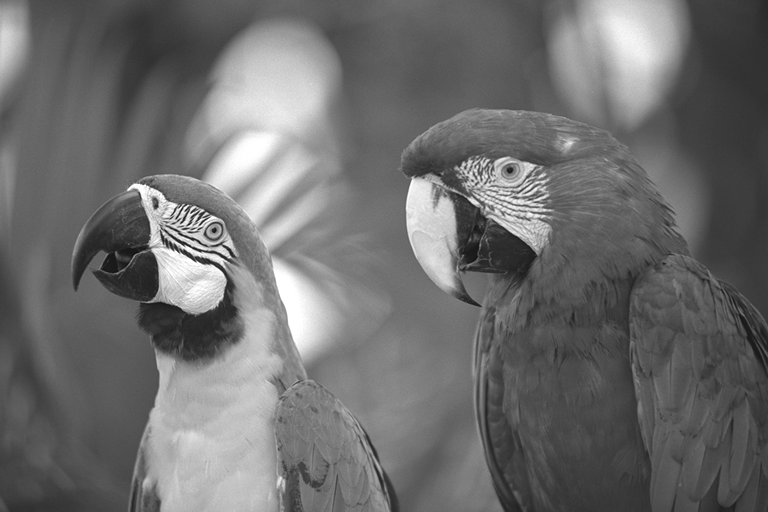

In [27]:
## 이미지를 확인
from PIL import Image

import requests
img = Image.open(requests.get(url, stream=True).raw)
img

# stream= True: 나눠서 다운받기, binary 파일 다운시 적용.
# requests로 url 의 이미지를 다운받아스 Image객체 생성.

In [31]:
model = "ydshieh/vit-gpt2-coco-en"
img2text = pipeline("image-to-text", model=model)
res = img2text(url, max_new_tokens=50)
# pipeline 에 max_token 지정 -> 출력 최대 글자수 지정.

res


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

[{'generated_text': 'two birds are standing next to each other '}]

In [30]:
res = img2text([
    'data/image1.jpg', 'data/image2.jpg','data/image3.jpg'
])
res

c:\Users\Playdata\AppData\Local\miniconda3\envs\NLP\Lib\site-packages\transformers\generation\utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[[{'generated_text': 'a man walking a dog down a path with a dog '}],
 [{'generated_text': 'a cat and a dog are standing on a wooden bench '}],
 [{'generated_text': 'a computer screen with a keyboard and mouse '}]]

### 이미지 분류

In [33]:
url = "https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202306/25/488f9638-800c-4bac-ad65-82877fbff79b.jpg"

In [ ]:
model = "google/vit-base-patch16-224"
classifier = pipeline(task="image-classification", model=model)
res = classifier([url, 'data/image1.jpg'])#, top_k=2)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [36]:
res

[[{'label': 'Egyptian cat', 'score': 0.8566710948944092},
  {'label': 'tabby, tabby cat', 'score': 0.046528249979019165},
  {'label': 'tiger cat', 'score': 0.03444959595799446},
  {'label': 'Persian cat', 'score': 0.0072631994262337685},
  {'label': 'Siamese cat, Siamese', 'score': 0.0037654258776456118}],
 [{'label': 'Old English sheepdog, bobtail', 'score': 0.9108920693397522},
  {'label': 'komondor', 'score': 0.0712052583694458},
  {'label': 'otterhound, otter hound', 'score': 0.004105465020984411},
  {'label': 'briard', 'score': 0.0033680449705570936},
  {'label': 'Afghan hound, Afghan', 'score': 0.001299488008953631}]]

In [37]:
classifier.model   # pipeline

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [38]:
classifier.model.config.id2label  # 모델이 학습한 class 들을 조회

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

### Object Detection

In [40]:
pip install timm


   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------------ --- 2.1/2.3 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 9.5 MB/s eta 0:00:00


In [3]:
from transformers import pipeline
image_path1 = r"data/image1.jpg"
image_path2 = r"data/image2.jpg"
image_path3 = r"data/image3.jpg"

model='facebook/detr-resnet-50'
o_detector = pipeline(task="object-detection", model=model)

res = o_detector([image_path1, image_path2, image_path3])
res

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[{'score': 0.9988904595375061,
   'label': 'dog',
   'box': {'xmin': 430, 'ymin': 423, 'xmax': 533, 'ymax': 597}},
  {'score': 0.9998466968536377,
   'label': 'person',
   'box': {'xmin': 531, 'ymin': 158, 'xmax': 673, 'ymax': 581}}],
 [{'score': 0.9981694221496582,
   'label': 'cat',
   'box': {'xmin': 541, 'ymin': 122, 'xmax': 719, 'ymax': 535}},
  {'score': 0.9980827569961548,
   'label': 'cat',
   'box': {'xmin': 198, 'ymin': 48, 'xmax': 373, 'ymax': 459}},
  {'score': 0.9971736669540405,
   'label': 'cat',
   'box': {'xmin': 0, 'ymin': 89, 'xmax': 255, 'ymax': 535}},
  {'score': 0.8180071115493774,
   'label': 'bench',
   'box': {'xmin': 218, 'ymin': 355, 'xmax': 718, 'ymax': 535}},
  {'score': 0.9972655773162842,
   'label': 'cat',
   'box': {'xmin': 366, 'ymin': 60, 'xmax': 580, 'ymax': 479}}],
 [{'score': 0.9956638216972351,
   'label': 'cell phone',
   'box': {'xmin': 96, 'ymin': 165, 'xmax': 136, 'ymax': 236}},
  {'score': 0.9919518232345581,
   'label': 'tv',
   'box': {'xm